In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/Mall_Customers (1).csv')
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
X = dataset.iloc[:,[3,4]].values
y = dataset.iloc[:,-1].values
print(X)


[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])], remainder = 'passthrough')
dataset = np.array(ct.fit_transform(dataset))
print(dataset)

[[  0.   1.   1.  19.  15.  39.]
 [  0.   1.   2.  21.  15.  81.]
 [  1.   0.   3.  20.  16.   6.]
 ...
 [  0.   1. 198.  32. 126.  74.]
 [  0.   1. 199.  32. 137.  18.]
 [  0.   1. 200.  30. 137.  83.]]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
dataset = imputer.fit_transform(dataset)
print(dataset)

[[  0.   1.   1.  19.  15.  39.]
 [  0.   1.   2.  21.  15.  81.]
 [  1.   0.   3.  20.  16.   6.]
 ...
 [  0.   1. 198.  32. 126.  74.]
 [  0.   1. 199.  32. 137.  18.]
 [  0.   1. 200.  30. 137.  83.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 45)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)

print(wcss)


[269981.28000000014, 183714.08082173267, 106348.37306211119, 100333.42351066107, 66497.19879639814, 59843.905146586105, 30566.45113025185, 25311.63315295815, 22826.19466089466, 20707.844479988966]


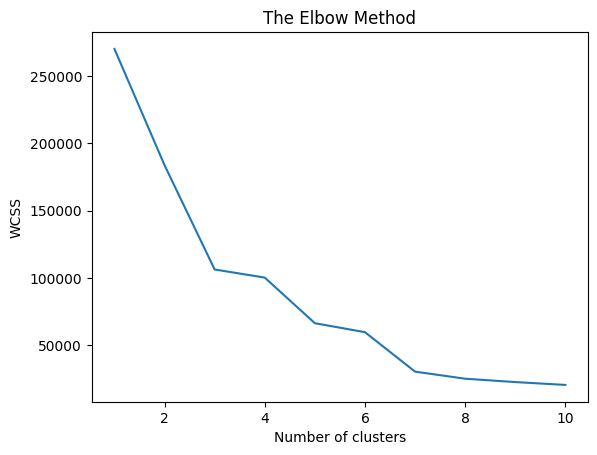

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
 kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 45)
 kmeans.fit(X)

KMeans(n_clusters=7, random_state=45)

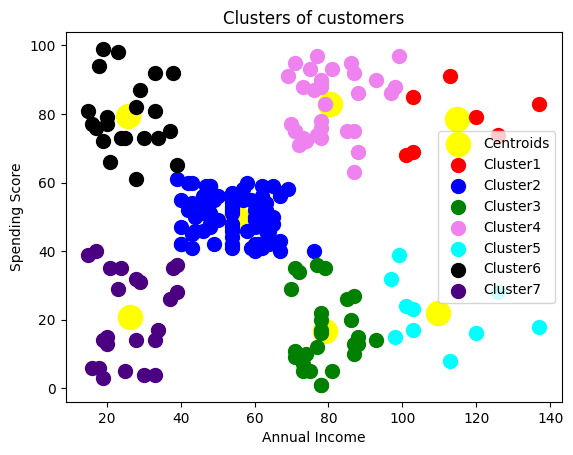

In [ ]:
y_kmeans = kmeans.predict(X)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='yellow',label='Centroids')
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0, 1],s=100, c='red',label='Cluster1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1, 1],s=100, c='blue',label='Cluster2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2, 1],s=100, c='green',label='Cluster3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3, 1],s=100, c='violet',label='Cluster4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4, 1],s=100, c='cyan',label='Cluster5')
plt.scatter(X[y_kmeans == 5,0],X[y_kmeans == 5, 1],s=100, c='black',label='Cluster6')
plt.scatter(X[y_kmeans == 6,0],X[y_kmeans == 6, 1],s=100, c='indigo',label='Cluster7')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()